# THE VERTEX COVER PROBLEM WITH APPLICATION IN CYBER SECURITY

# **Tackling Kill-Chains with Quantum Computing - The Patch Management challenge**

_Demonstration is based on work submitted by Mark Carney on November 2022 [[1](#Patch)]_

The Min Vertex Cover (MVC) problem is a classical problem in graph theory and computer science, where we aim to find a minimum set of vertices such that each edge of the graph is incident to at least one vertex in the set.

By introducing vulnerability graphs, related to attack graphs, we showcase a subsequent method for solving significant cyber security problems with quantum computing using Classiq.

In the following example we will suggest a method to prioritize patches by expressing the connectivity of various vulnerabilities on a network with a QUBO, then solving this with Classiq. Such a solution has the potential to effectively remove significant kill-chains (paths to security compromise) within a given network leveraging a quantum computer.

## **Introduction**

Patch management is a common pain point for any large scaled enterprises or widely distributed systems such as smartphones or IoT devices. Indeed, lack of appropriate patching was indicated as being a central cause for some high profile cybersecurity breaches.

A variety of approaches have been proposed to improve the categorization and management of patches, including deep learning technologies.

I this demonstration, we suggest a method of prioritizing patch management by analyzing vulnerability data on assets as a bipartite graph. Given the reason that attacks are made up of 'kill chains', which are themselves comprised of sequences of exploits leveraging vulnerabilities (that are coincident - in our model), we suggest a process through which we can disconnect vulnerability sequences to significantly reduce potential kill-chains in a given network.

This challenge, however, involves a known NP-hard problem.

By leveraging quantum computation and optimization methods for vulnerability analysis of this kind, new avenues of optimization of cyber security and related data may be considered

**_<div class="alert alert-success">Our aim is to present a method to prioritise the patching of vulnerabilities by considering their connectivity and solving for this using Classiq.</div>_**

## **Bipartite Graph Representation**

The heart of the methodology represents vulnerabilities and assets as nodes in a bipartite graph.
Quick terminology:

### Kill Chains

A 'kill chain' is a multi-stage sequence of events that leads to the compromise of a network. What is apparent is that many of the examples of kill-chains involve sequences of vulnerabilities, with the sequence dependent on the assets that are intersected between these vulnerabilities.

**_Vulnerabilities:_** _A vulnerability is a weaknesses in the system that results from an error in the design, implementation, or configuration of the operating system or an application software._

**_Assets:_** _An asset is an item that has value, for example, data stored in the system. The availability, consistency and integrity of assets are to be preserved._

### Attack graphs

'Attack graphs' have featured in some interesting approaches to managing and mitigating security threats.
They provide various ways regarding how to analyze network-oriented vulnerability data that many cybersecurity information sources generate.

Attack graphs are labeled transition systems that model an adversary capabilities
within a network and how those can be elevated by transitioning to new states via the exploitation of
vulnerabilities (e.g., a weak password, a bug in a software package, the ability to guess a stack address, etc.).

For example, attack graphs can discover paths that an adversary may use to escalate his privileges to compromise
a given target (e.g., customer database or an administrator account). These sequences of possible vulnerabilities and asset pathways are commonly known as "kill chains." Kill chains depict comprehensive attack scenarios that outline the steps taken to target a specific critical asset.

<center><img src="https://docs.classiq.io/resources/Attack_graph.jpg" width=700/></center>

_<div class="alert alert-info">Attack Graph example</div>_

### Vulnerability graphs

We suggest using a graph theoretic way of analyzing vulnerabilities on a computer network called 'vulnerability graphs', derived from the notion of 'attack graphs'.

A graph $G = (V, E)$; $V(G)$ a set of vertices and a set of edges $E(G) \in V \times V$, $E$ is composed of pairs of elements from $V$.

A bipartite graph $G$ is a graph with a partition of $V(G)$ into two sets $A, B$ such that $\forall(a,b)\in E(G)$, $a\in A$ and $b\in B$.

**A vulnerability graph** $G$ is a bipartite graph where one partition of vertices represents network assets, and the other represents vulnerabilities. Let the edges of $G$ represent that a given asset is affected by some detected vulnerability.

**A kill chain** is a sequence of vertices $K = {v1 , v2 , . . . v_n }$ from the vulnerability partition of a vulnerability graph $V$ such that for each $v_i, v_j \in K$, there exists at least one asset $a \in V$ with $(v_i,a),(v_j,a) \in E(G)$.

- _Whilst the formulation in utilities directed graphs, for simplicity we will use undirected simple graphs to represent the same data._

- _It is worth pointing out that the lack of any information coded about severity ratings for vulnerabilities, e.g. CVSS scores. This methodology output is not considered here as critical vulnerabilities (that should always be patched as soon as possible) but rather aims to find the  issues that are widespread and well connected enough to cause potential harm._

### Connectivity Dual Graphs

The dual graph $D_G$ is constructed as follows. For each vulnerability vertex $v_i \in V (G)$ for $1  \leq i \leq|V(G)|$:

1. Add $v_i$ to $V(D_G)$ if $v_i \in V(D_G)$.
2. Enumerate a list of assets vertices ${a0 , a1 , . . .}$ connected to $v_i$.
3. Iterating over this list of assets, for each $v_i' $ connected to each host $a_j$:
   1. Add $v_i'$ to $V (D_G)$.
   2. Add $(v_i,v_i')$ to $E(D_G)$
   3. If $(v_i,v_i')$ already exists, add 1 to the weight of that edge.
4. Remove $v_i$ from $V (G)$ and continue with $v_i+1$.

The dual $D_G$ represents all of the connections between vulnerabilities on attack graphs.

### Removing Kill-chains with Vertex Covers

Removing the vertices in a vertex cover on $D_G$ from $V(G)$ will leave V totally disconnected on the vulnerability partition to itself via the host partition.

By removing every 'vulnerability-host-vulnerability' sub-path in a vulnerability graph $V$ by means of a minimum vertex cover on $D_G$, we have removed a significant amount of kill chains $K$ found in the paths of $G$.

### Minimum Vertex Cover: Mathematical Formulation

The Min Vertex Cover problem can be formulated as an Integer Linear Program (ILP):

Minimize:
$\sum_{i \in V} x_i$

Subject to:
$(1 - x_i)(1 - x_j)=0 \quad  \forall (i,j) \in E_0$

and
$x_i \in \{0, 1\} \quad \forall i \in V$

Where:

- $x_i$ is a binary variable that equals 1 if node $i$ is in the cover and 0 otherwise
- $E_0$ is the set of all edges (connected and not connected)
- $V$ is the set of vertices in the graph

**_<div class="alert alert-success">By utilizing a quantum computing setup, we can solve an NP-hard problem efficiently.
We can reduce the time required to find the most at-risk vulnerabilities and patch them with more priority. We have the potential to iterate over security data more effectively with feedback from new information and thus better our security posture.</div>_**

### _A toy network example_

We present the following vulnerability graph $V$, with assets $a$ to $g$, and vulnerabilities $1$ through $8$:

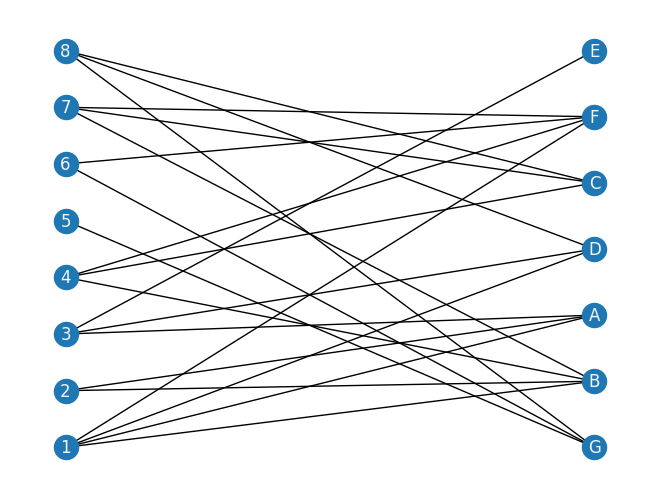

In [1]:
import networkx as nx

edge_dict = {
    1: ["A", "B", "D", "F"],
    2: ["A", "B"],
    3: ["A", "D", "E"],
    4: ["B", "C", "F"],
    5: ["G"],
    6: ["F", "G"],
    7: ["B", "C", "F"],
    8: ["C", "D", "G"],
}

B = nx.Graph()
B.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8], bipartite=0)
B.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"], bipartite=1)
for u in range(1, 9):
    for v in edge_dict[u]:
        B.add_edge(u, v)
X, Y = nx.bipartite.sets(B)
nx.draw(B, pos=nx.bipartite_layout(B, X), with_labels=True, font_color="whitesmoke")

**_<div class="alert alert-info">Above is the bipartite graph with vulnerabilities on the left and assets on the right</div>_**

An example of a Kill-Chain path incorporated into our Venerability Graph would be for example:

<center><img src="https://docs.classiq.io/resources/Attack_path.png" width=700/></center>

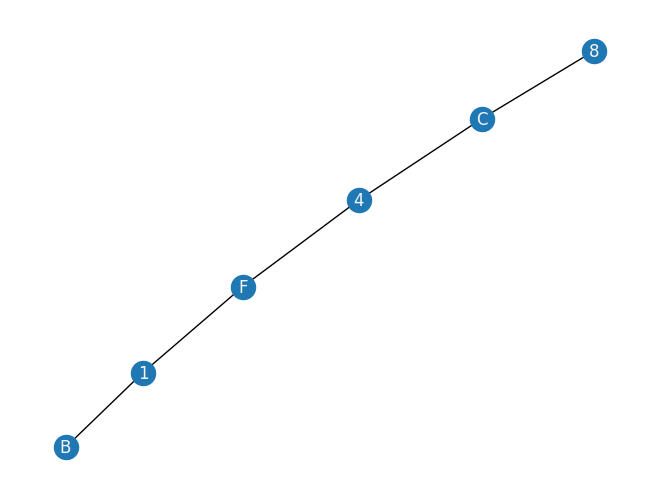

In [2]:
import networkx as nx

kill_chain_example_edge_dict = {1: ["B", "F"], 4: ["F", "C"], 8: ["C"]}

B_example = nx.Graph()
B_example.add_nodes_from([1, 4, 8], bipartite=0)
B_example.add_nodes_from(["B", "C", "F"], bipartite=1)
for u in [1, 4, 8]:
    for v in kill_chain_example_edge_dict[u]:
        B_example.add_edge(u, v)
nx.draw(B_example, with_labels=True, font_color="whitesmoke")

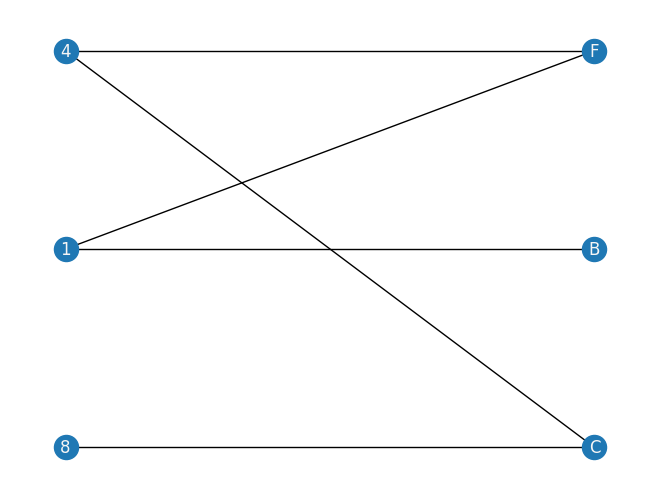

In [3]:
X, Y = nx.bipartite.sets(B_example)
nx.draw(
    B_example,
    pos=nx.bipartite_layout(B_example, X),
    with_labels=True,
    font_color="whitesmoke",
)

From this graph we can get the following dual graph $DV$ :

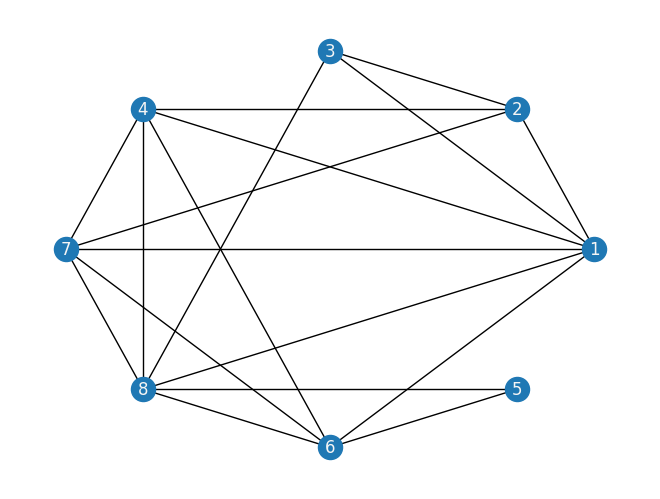

In [4]:
B_dual = nx.Graph()

B_2 = B.copy()

S, T = nx.bipartite.sets(B_2)
# nx.draw(B_2, pos=nx.bipartite_layout(B_2,S), with_labels=True)


# iterate over one side of the bipartite graph
# and construct the dual from the paper.
def gen_dual(B_2, S=None):
    B_2c = B_2.copy()
    DualG = nx.Graph()
    if not S:
        S, _ = nx.bipartite.sets(B_2c)
    for s in S:
        DualG.add_node(s)
        # iter over all nodes s talks to
        for t1 in B_2c.neighbors(s):
            for t2 in B_2c.neighbors(t1):
                if t2 != s:
                    DualG.add_edge(s, t2)
        B_2c.remove_node(s)
    return DualG


DG = gen_dual(B_2, S)
nx.draw(DG, pos=nx.circular_layout(DG), with_labels=True, font_color="whitesmoke")

**_<div class="alert alert-info">Above is the Dual Graph we want to solve the Minimum Vertex Cover (MVC) for</div>_**

### Building the optimization model from a graph input

To build the optimization model we will utilize Pyomo.
Pyomo is a Python-based, open-source optimization modeling language with a diverse set of optimization capabilities.
We will formalize our QUBO model into a pyomo model object.

**_Classiq seamlessly incorporates the pyomo object into its Model_**

We proceed by defining the pyomo model that will be used to build a Classiq Model.
Using the mathematical formulation defined above:

In [5]:
import networkx as nx
import pyomo.core as pyo


def mvc(graph: nx.Graph) -> pyo.ConcreteModel:
    model = pyo.ConcreteModel()
    model.x = pyo.Var(graph.nodes, domain=pyo.Binary)
    nodes = list(graph.nodes())

    @model.Constraint(graph.edges)
    def full_cover(model, i, j):
        # all sets are covered
        return ((1 - model.x[i]) * (1 - model.x[j])) == 0

    def obj_expression(model):
        # number of nodes selected
        return sum(model.x.values())

    model.cost = pyo.Objective(rule=obj_expression, sense=pyo.minimize)

    return model

The model contains:

- Binary variable declaration for each node (model.x) indicating whether the variable is chosen for the set.
- Constraint rule: ensures that all edges are covered.
- Objective rule: minimize the number of nodes selected.

In [6]:
mvc_model = mvc(DG)

In [7]:
mvc_model.pprint()

2 Set Declarations
    full_cover_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     2 :    Any :   18 : {(1, 2), (1, 3), (1, 4), (1, 6), (1, 7), (1, 8), (2, 3), (2, 4), (2, 7), (3, 8), (4, 6), (4, 7), (4, 8), (6, 5), (7, 6), (7, 8), (8, 5), (8, 6)}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    8 : {1, 2, 3, 4, 5, 6, 7, 8}

1 Var Declarations
    x : Size=8, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :  None :     1 : False :  True : Binary
          2 :     0 :  None :     1 : False :  True : Binary
          3 :     0 :  None :     1 : False :  True : Binary
          4 :     0 :  None :     1 : False :  True : Binary
          5 :     0 :  None :     1 : False :  True : Binary
          6 :     0 :  None :     1 : False :  True : Binary
          7 :     0 :  None :     1 : False :  True : Bin

**We are set to go!**

## **Solving with Classiq**

We go through the steps of solving the problem with Classiq, using QAOA algorithm [[2](#QAOA)].

### Quantum Approximate Optimization Algorithm (QAOA)

QAOA is a quantum algorithm designed to solve combinatorial optimization problems, making it an ideal candidate for tackling the Minimum Vertex Cover problem in large-scale WSNs.

Applying QAOA to the modeled graph, we iteratively adjust parameters to navigate the solution space and identify the minimum vertex cover. Quantum computing's unique ability to explore multiple solution candidates simultaneously accelerates the optimization process, significantly outperforming classical algorithms for complex problems.

**_<div class="alert alert-success">To solve the Patching Prioritization Problem with Classiq we will: 1. Build a Classiq Model 2. Generate a parameterized Quantum Circuit 3. Execute the circuit and optimize parameters to get the optimal solution</div>_**

In [8]:
import classiq

# classiq.authenticate(overwrite=True)

## 1. Build a Classiq Model

In order to solve the Pyomo model defined above, we use the Classiq combinatorial optimization engine. For the quantum part of the QAOA algorithm (`QAOAConfig`) - define the number of repetitions (`num_layers`):

In [9]:
from classiq import construct_combinatorial_optimization_model
from classiq.applications.combinatorial_optimization import OptimizerConfig, QAOAConfig

qaoa_config = QAOAConfig(num_layers=1)

For the classical optimization part of the QAOA algorithm we define the classical optimization configuration through the `OptimizerConfig` object where the maximum number of classical iterations (`max_iteration`) and the $\alpha$-parameter (`alpha_cvar`) for running CVaR-QAOA, an improved variation of the QAOA algorithm [[3](#cvar)], are defined:

In [10]:
optimizer_config = OptimizerConfig(max_iteration=60, alpha_cvar=0.9)

Lastly, we load the model, based on the problem and algorithm parameters, which we can use to solve the problem:

**_Classiq seamlessly incorporates the classical pyomo optimization object into its Model_**

In [11]:
qmod = construct_combinatorial_optimization_model(
    pyo_model=mvc_model,
    qaoa_config=qaoa_config,
    optimizer_config=optimizer_config,
)

Our Classiq Model (`qmod`) already incorporates the QAOA execution logic. However, we can set the quantum backend we wish to execute on so the Classiq synthesis engine will take it into consideration when generating an optimized Quantum Circuit:

In [12]:
from classiq import set_execution_preferences
from classiq.execution import ClassiqBackendPreferences, ExecutionPreferences

backend_preferences = ExecutionPreferences(
    backend_preferences=ClassiqBackendPreferences(backend_name="simulator")
)

qmod = set_execution_preferences(qmod, backend_preferences)

**_<div class="alert alert-success">That's it! Our Classiq Model is set!!</div>_**
We can write our Model to file and view all quantum configurations and execution logic.

In [13]:
from classiq import write_qmod

write_qmod(qmod, "patch_min_vertex_cover")

_The above file can also be loaded to our web IDE for further analysis and ease of execution._

## 2. Generate a parameterized Quantum Circuit

**_<div class="alert alert-success">Super simple! We can `synthesize` our Model and view the QAOA circuit (ansatz) used to solve the optimization problem:</div>_**

In [14]:
from classiq import show, synthesize

qprog = synthesize(qmod)
show(qprog)

Opening: https://platform.classiq.io/circuit/aac83c06-a135-48ab-8a8c-2cd3977be258?version=0.45.0.dev0%2Bcf1b9b7ccc


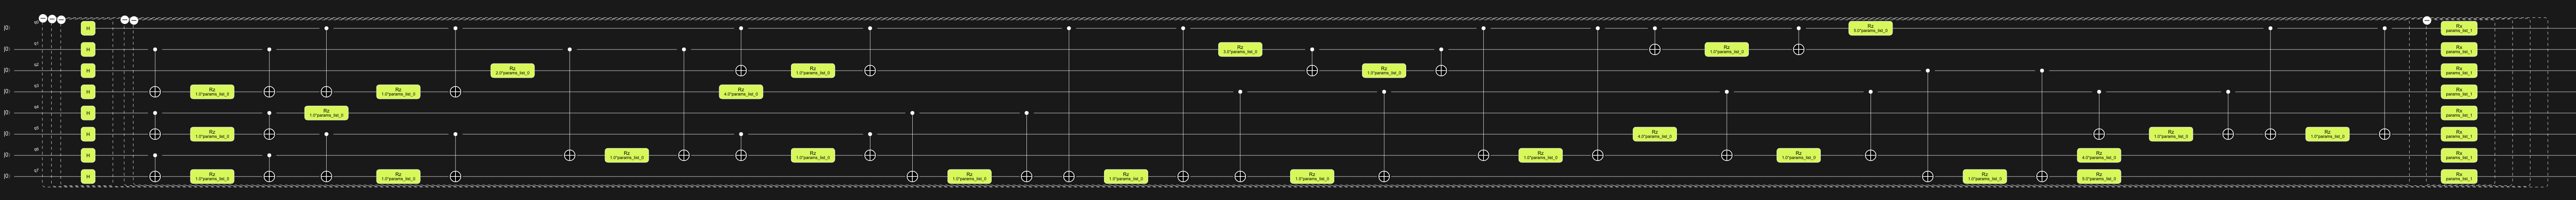

## 3. Execute the circuit: optimize parameters to get the optimal solution

**_<div class="alert alert-success">To solve the problem using the generated quantum program, we just use the `execute` function:</div>_**

In [15]:
from classiq import execute

res = execute(qprog).result()

### Analyzing the execution results

#### Energy convergence

First, let's check the Energy convergence through the iterations:

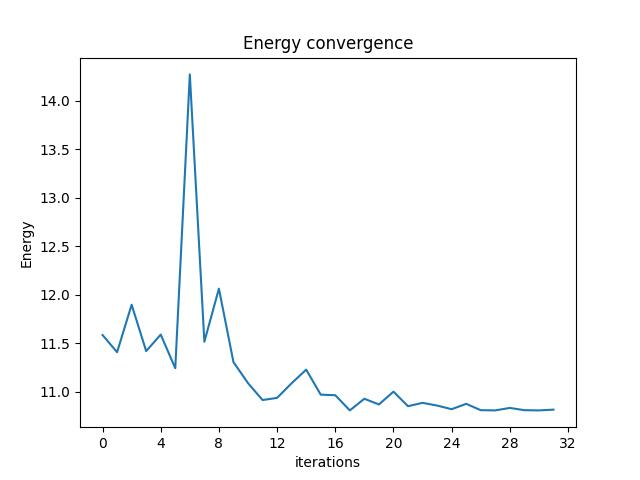

In [16]:
from classiq.execution import VQESolverResult

vqe_result = VQESolverResult.parse_obj(res[0].value)
vqe_result.convergence_graph

#### Optimization Results

We can also examine the statistics of the algorithm:

In [17]:
import pandas as pd

from classiq.applications.combinatorial_optimization import (
    get_optimization_solution_from_pyo,
)

solution = get_optimization_solution_from_pyo(
    mvc_model, vqe_result=vqe_result, penalty_energy=qaoa_config.penalty_energy
)

optimization_result = pd.DataFrame.from_records(solution)
optimization_result.sort_values(by="cost", ascending=True).head(5)

,probability,cost,solution,count
205,0.001,5.0,"[1, 1, 0, 0, 0, 1, 1, 1]",1
200,0.001,5.0,"[1, 1, 0, 1, 0, 1, 0, 1]",1
178,0.001,6.0,"[1, 1, 0, 1, 1, 0, 1, 1]",1
180,0.001,6.0,"[1, 0, 1, 1, 0, 1, 1, 1]",1
191,0.001,6.0,"[1, 0, 1, 1, 1, 1, 1, 0]",1


And the histogram:

array([[<Axes: title={'center': 'cost'}>]], dtype=object)

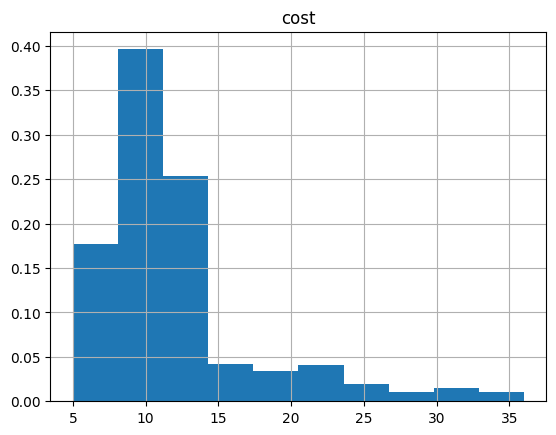

In [18]:
optimization_result.hist("cost", weights=optimization_result["probability"])

#### Plot the optimal solution!

In [19]:
best_solution = optimization_result.solution[optimization_result.cost.idxmin()]

In [20]:
best_solution

[1, 1, 0, 1, 0, 1, 0, 1]

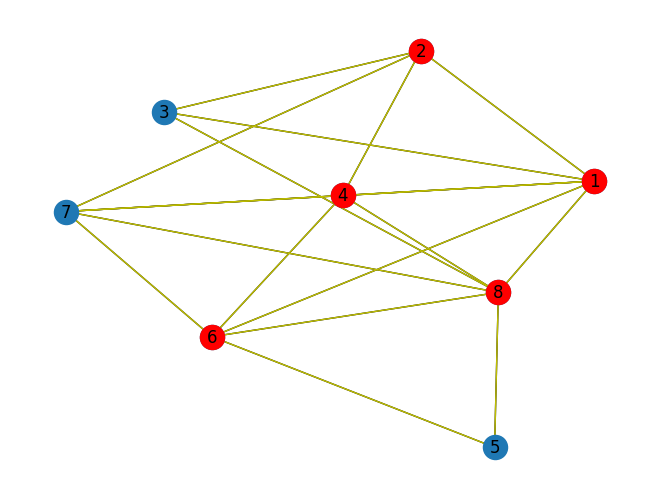

In [21]:
def draw_solution(graph: nx.Graph, solution: list):
    solution_nodes = [v for v in graph.nodes if solution[v - 1]]
    solution_edges = [
        (u, v) for u, v in graph.edges if u in solution_nodes or v in solution_nodes
    ]
    nx.draw_kamada_kawai(graph, with_labels=True)
    nx.draw_kamada_kawai(
        graph,
        nodelist=solution_nodes,
        edgelist=solution_edges,
        node_color="r",
        edge_color="y",
    )


draw_solution(DG, best_solution)

**_<div class="alert alert-success">We obtained a set of vertices that form the minimum vertex cover!</div>_**

Removing these nodes from our original vulnerability graph $V$ we get:

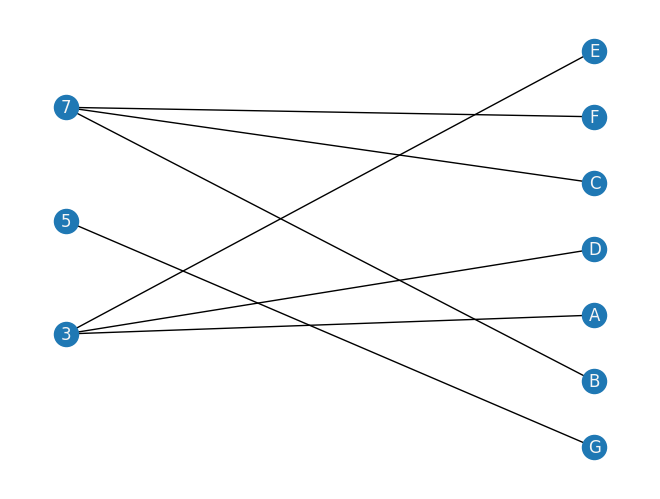

In [22]:
check_B = B.copy()
vc2 = [v for v in DG.nodes if best_solution[v - 1]]
for v in vc2:
    check_B.remove_node(v)

nx.draw(
    check_B,
    pos=nx.bipartite_layout(check_B, S),
    with_labels=True,
    font_color="whitesmoke",
)

**_<div class="alert alert-success">Given the the MVCV vulnerability nodes are patched - the rest of the vulnerabilities are disconnected from each other. This will significantly break most of our network Kill-Chains</div>_**

## Larger scale models

TBD

**_<div class="alert alert-success">The leveraging of short time solutions to NP hard problems that are present in cybersecurity data is a potentially rich vein of exciting possibilities. The fast and efficient resolution of cybersecurity data problems also helps reduce the analysis and reaction times of security teams</div>_**


## References

<a id='Patch'>[1]</a>: [Cutting Medusa's Path -- Tackling Kill-Chains with Quantum Computing.](https://arxiv.org/abs/2211.13740)

<a id='QAOA'>[2]</a>: [Farhi, Edward, Jeffrey Goldstone, and Sam Gutmann. "A quantum approximate optimization algorithm." arXiv preprint arXiv:1411.4028 (2014).](https://arxiv.org/abs/1411.4028)

<a id='cvar'>[3]</a>: [Barkoutsos, Panagiotis Kl, et al. "Improving variational quantum optimization using CVaR." Quantum 4 (2020): 256.](https://arxiv.org/abs/1907.04769)
